<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter04/Chapter_4_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🔧 Instalasi library yang dibutuhkan untuk Hands-on ML Chapter 3
!pip install --upgrade pip
!pip install numpy matplotlib scikit-learn pandas
!pip install numpy matplotlib scikit-learn
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


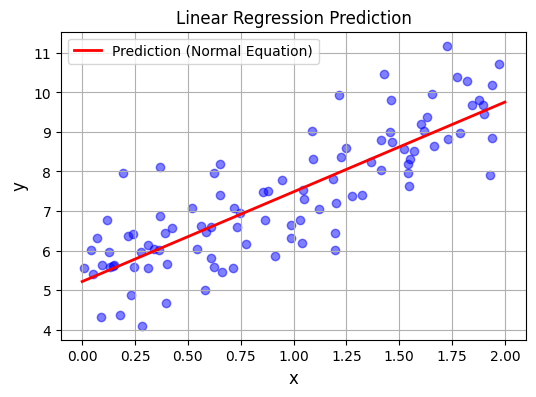

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Membuat data linear dengan sedikit noise
np.random.seed(42)
sample_size = 100
X_data = 2 * np.random.rand(sample_size, 1)
y_data = 5 + 2.5 * X_data + np.random.randn(sample_size, 1)

# Step 2: Menambahkan bias (x0 = 1) ke input
X_biased = np.c_[np.ones((sample_size, 1)), X_data]

# Step 3: Menghitung parameter optimal menggunakan Normal Equation
theta_best = np.linalg.inv(X_biased.T @ X_biased) @ X_biased.T @ y_data

# Step 4: Prediksi hasil untuk nilai x baru
X_new = np.array([[0], [2]])
X_new_biased = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_biased @ theta_best

# Visualisasi hasil regresi
plt.figure(figsize=(6,4))
plt.plot(X_new, y_pred, "r-", label="Prediction (Normal Equation)", linewidth=2)
plt.scatter(X_data, y_data, color='blue', alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Linear Regression Prediction")
plt.legend()
plt.grid(True)
plt.show()


Intercept (θ₀): [5.21509616]
Coefficient (θ₁): [[2.27011339]]


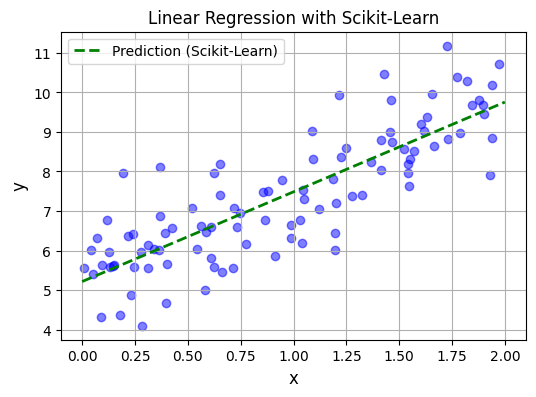

In [3]:
# Linear Regression dengan Scikit-Learn

from sklearn.linear_model import LinearRegression

# Step 1: Buat dan latih model
model = LinearRegression()
model.fit(X_data, y_data)

# Step 2: Lihat parameter hasil pelatihan
print("Intercept (θ₀):", model.intercept_)
print("Coefficient (θ₁):", model.coef_)

# Step 3: Prediksi untuk nilai x baru
y_sk_pred = model.predict(X_new)

# Visualisasi hasil regresi
plt.figure(figsize=(6,4))
plt.plot(X_new, y_sk_pred, "g--", label="Prediction (Scikit-Learn)", linewidth=2)
plt.scatter(X_data, y_data, color='blue', alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Linear Regression with Scikit-Learn")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# Menggunakan np.linalg.lstsq untuk menghitung parameter regresi
theta_lstsq, residuals, rank, singular_values = np.linalg.lstsq(X_biased, y_data, rcond=None)

print("Theta (via lstsq):")
print(theta_lstsq)


Theta (via lstsq):
[[5.21509616]
 [2.27011339]]


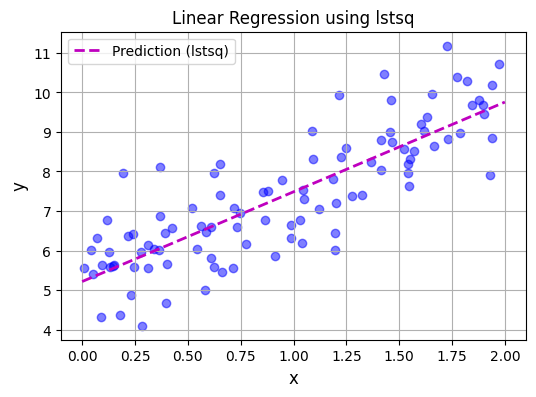

In [5]:
# Prediksi dan visualisasi
y_lstsq_pred = X_new_biased @ theta_lstsq

plt.figure(figsize=(6,4))
plt.plot(X_new, y_lstsq_pred, "m--", label="Prediction (lstsq)", linewidth=2)
plt.scatter(X_data, y_data, color='blue', alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Linear Regression using lstsq")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Menggunakan pseudoinverse (Moore-Penrose)
theta_pinv = np.linalg.pinv(X_biased) @ y_data

print("Theta (via pinv):")
print(theta_pinv)


Theta (via pinv):
[[5.21509616]
 [2.27011339]]


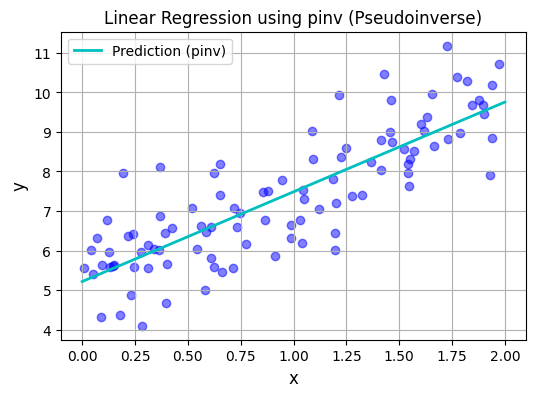

In [7]:
# Prediksi dan visualisasi
y_pinv_pred = X_new_biased @ theta_pinv

plt.figure(figsize=(6,4))
plt.plot(X_new, y_pinv_pred, "c-", label="Prediction (pinv)", linewidth=2)
plt.scatter(X_data, y_data, color='blue', alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Linear Regression using pinv (Pseudoinverse)")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Batch Gradient Descent untuk Linear Regression

# Siapkan ulang dataset & bias
np.random.seed(42)
m = 100
X_batch = 2 * np.random.rand(m, 1)
y_batch = 5 + 2.5 * X_batch + np.random.randn(m, 1)
X_b_batch = np.c_[np.ones((m, 1)), X_batch]

# Inisialisasi random theta
theta_bgd = np.random.randn(2, 1)

# Hyperparameter
learning_rate = 0.1
iterations = 1000

# Training loop
for step in range(iterations):
    gradients = (2/m) * X_b_batch.T @ (X_b_batch @ theta_bgd - y_batch)
    theta_bgd = theta_bgd - learning_rate * gradients

print("Theta (Batch GD):")
print(theta_bgd)


Theta (Batch GD):
[[5.21509616]
 [2.27011339]]


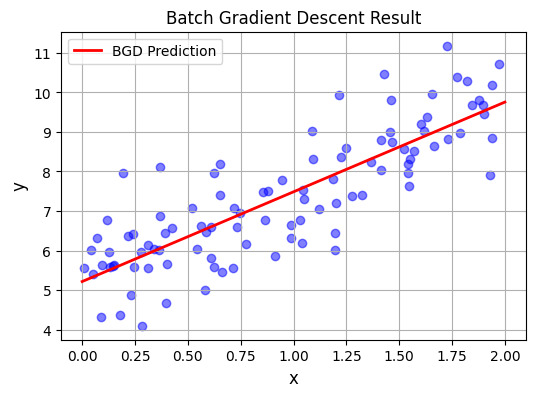

In [9]:
# Plot hasil prediksi GD
X_new_gd = np.array([[0], [2]])
X_new_b_gd = np.c_[np.ones((2, 1)), X_new_gd]
y_pred_gd = X_new_b_gd @ theta_bgd

plt.figure(figsize=(6,4))
plt.plot(X_new_gd, y_pred_gd, "r-", linewidth=2, label="BGD Prediction")
plt.scatter(X_batch, y_batch, color='blue', alpha=0.5)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title("Batch Gradient Descent Result")
plt.legend()
plt.grid(True)
plt.show()


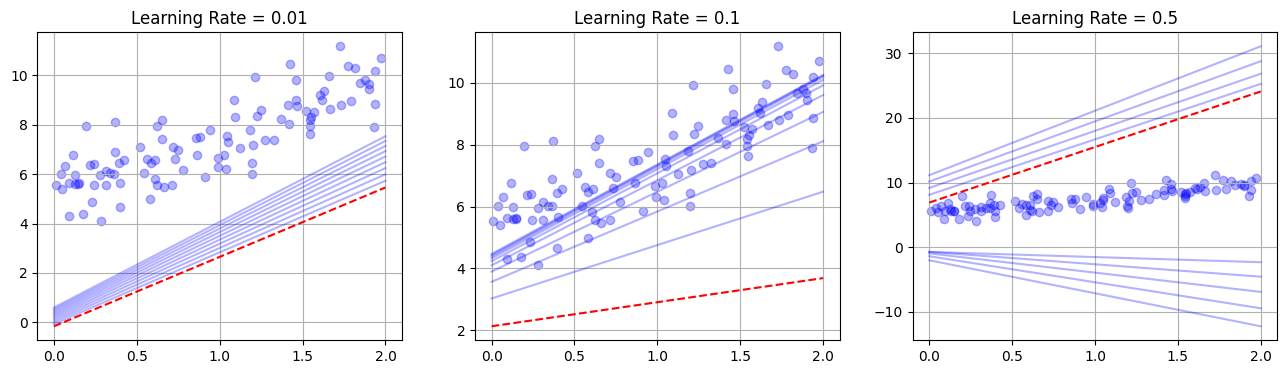

In [10]:
# Fungsi untuk plotting dengan learning rate berbeda
def plot_bgd_with_lr(lr):
    theta_temp = np.random.randn(2, 1)
    for iteration in range(10):
        gradients = 2/m * X_b_batch.T.dot(X_b_batch.dot(theta_temp) - y_batch)
        theta_temp = theta_temp - lr * gradients
        if iteration == 0:
            plt.plot(X_new_gd, X_new_b_gd.dot(theta_temp), "r--", label="Start")
        else:
            plt.plot(X_new_gd, X_new_b_gd.dot(theta_temp), "b-", alpha=0.3)

# Visualisasi dengan berbagai learning rate
plt.figure(figsize=(16, 4))

for i, lr in enumerate([0.01, 0.1, 0.5]):
    plt.subplot(1, 3, i+1)
    plot_bgd_with_lr(lr)
    plt.scatter(X_batch, y_batch, color='blue', alpha=0.3)
    plt.title(f"Learning Rate = {lr}")
    plt.grid(True)

plt.show()


In [11]:
# SGD untuk Linear Regression

# Data tetap pakai X_batch dan y_batch
np.random.seed(42)
theta_sgd = np.random.randn(2, 1)  # inisialisasi random

n_epochs = 50
t0, t1 = 5, 50  # parameter learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

# Simpan jalur theta untuk visualisasi nanti
theta_path_sgd = []

# Training loop
for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b_batch[random_idx:random_idx+1]
        yi = y_batch[random_idx:random_idx+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        theta_path_sgd.append(theta_sgd)

print("Theta (SGD):")
print(theta_sgd)


Theta (SGD):
[[5.2104379 ]
 [2.24885161]]


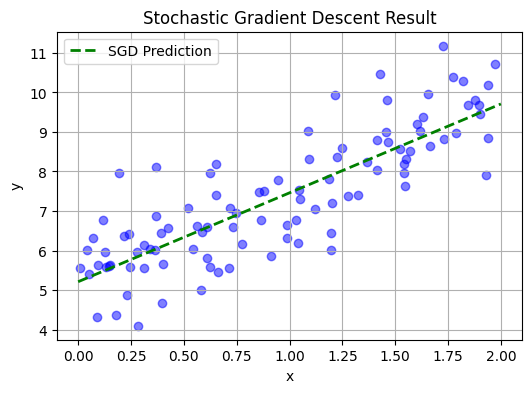

In [12]:
# Prediksi & visualisasi
y_pred_sgd = X_new_b_gd @ theta_sgd

plt.figure(figsize=(6,4))
plt.plot(X_new_gd, y_pred_sgd, "g--", linewidth=2, label="SGD Prediction")
plt.scatter(X_batch, y_batch, color='blue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Stochastic Gradient Descent Result")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# Mini-Batch Gradient Descent

np.random.seed(42)
theta_mbgd = np.random.randn(2, 1)  # inisialisasi

n_epochs = 50
minibatch_size = 20
t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
theta_path_mbgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b_batch[shuffled_indices]
    y_shuffled = y_batch[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta_mbgd - yi)
        eta = learning_schedule(t)
        theta_mbgd = theta_mbgd - eta * gradients
        theta_path_mbgd.append(theta_mbgd)

print("Theta (Mini-Batch GD):")
print(theta_mbgd)


Theta (Mini-Batch GD):
[[5.25214623]
 [2.2896409 ]]


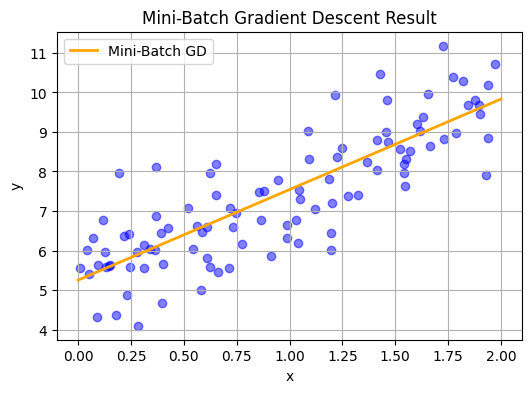

In [14]:
# Prediksi & visualisasi
y_pred_mbgd = X_new_b_gd @ theta_mbgd

plt.figure(figsize=(6,4))
plt.plot(X_new_gd, y_pred_mbgd, "orange", linewidth=2, label="Mini-Batch GD")
plt.scatter(X_batch, y_batch, color='blue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Mini-Batch Gradient Descent Result")
plt.legend()
plt.grid(True)
plt.show()


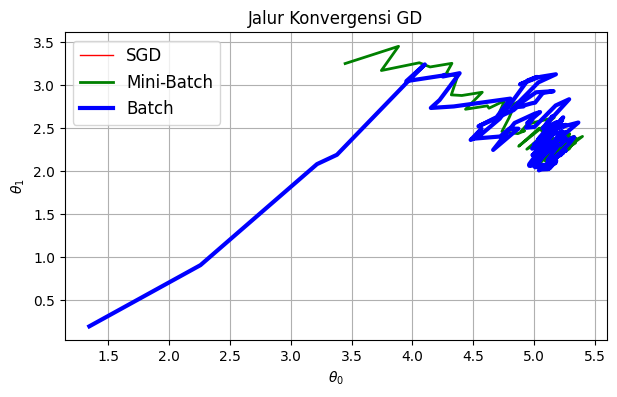

In [15]:
# Konversi semua path ke numpy array
theta_path_bgd = np.array(theta_path_sgd[:len(theta_path_mbgd)])
theta_path_sgd = np.array(theta_path_sgd[:len(theta_path_mbgd)])
theta_path_mbgd = np.array(theta_path_mbgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-", label="SGD", linewidth=1)
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], "g-", label="Mini-Batch", linewidth=2)
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-", label="Batch", linewidth=3)
plt.legend(fontsize=12)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.title("Jalur Konvergensi GD")
plt.grid(True)
plt.show()


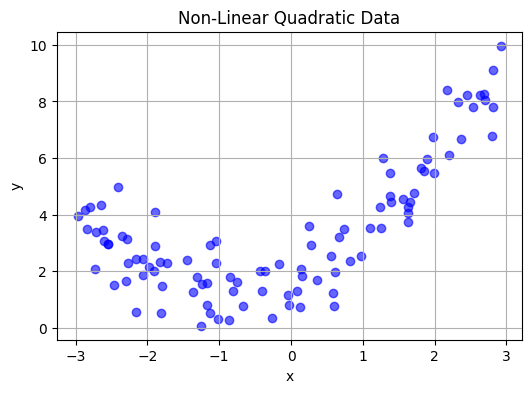

In [16]:
# Dataset kuadratik (non-linear)
np.random.seed(42)
m = 100
X_poly_raw = 6 * np.random.rand(m, 1) - 3
y_poly = 0.5 * X_poly_raw**2 + X_poly_raw + 2 + np.random.randn(m, 1)

# Visualisasi data
plt.figure(figsize=(6,4))
plt.scatter(X_poly_raw, y_poly, color='blue', alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linear Quadratic Data")
plt.grid(True)
plt.show()


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ubah jadi polynomial degree-2
poly_transformer = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_transformer.fit_transform(X_poly_raw)

# Lihat hasil transformasi satu sampel
print("X[0]:", X_poly_raw[0])
print("X_poly[0]:", X_poly[0])


X[0]: [-0.75275929]
X_poly[0]: [-0.75275929  0.56664654]


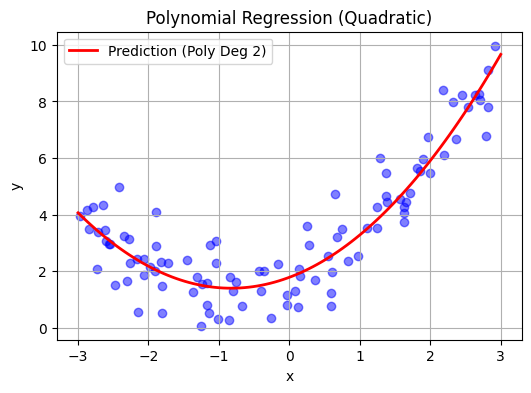

In [18]:
# Latih model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_poly)

# Prediksi dan visualisasi
X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly_transformer.transform(X_plot)
y_plot = lin_reg_poly.predict(X_plot_poly)

plt.figure(figsize=(6,4))
plt.plot(X_plot, y_plot, "r-", linewidth=2, label="Prediction (Poly Deg 2)")
plt.scatter(X_poly_raw, y_poly, color='blue', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Regression (Quadratic)")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, label=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train RMSE")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Val RMSE")
    if label:
        plt.title(label)
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.grid(True)


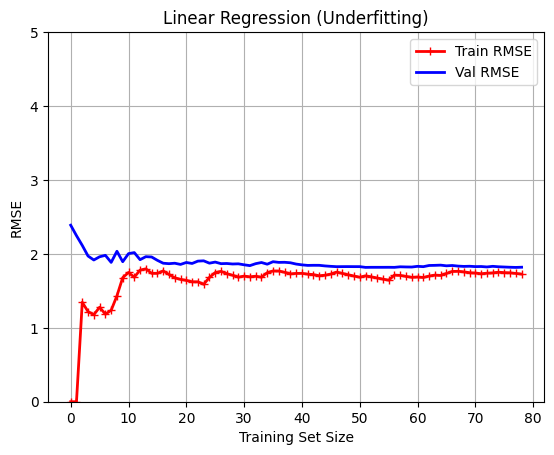

In [20]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly_raw, y_poly, label="Linear Regression (Underfitting)")
plt.ylim(0, 5)
plt.show()


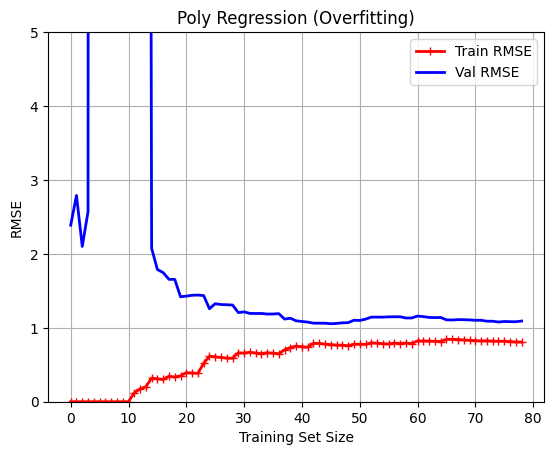

In [21]:
from sklearn.pipeline import Pipeline

poly10_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(poly10_pipeline, X_poly_raw, y_poly, label="Poly Regression (Overfitting)")
plt.ylim(0, 5)
plt.show()


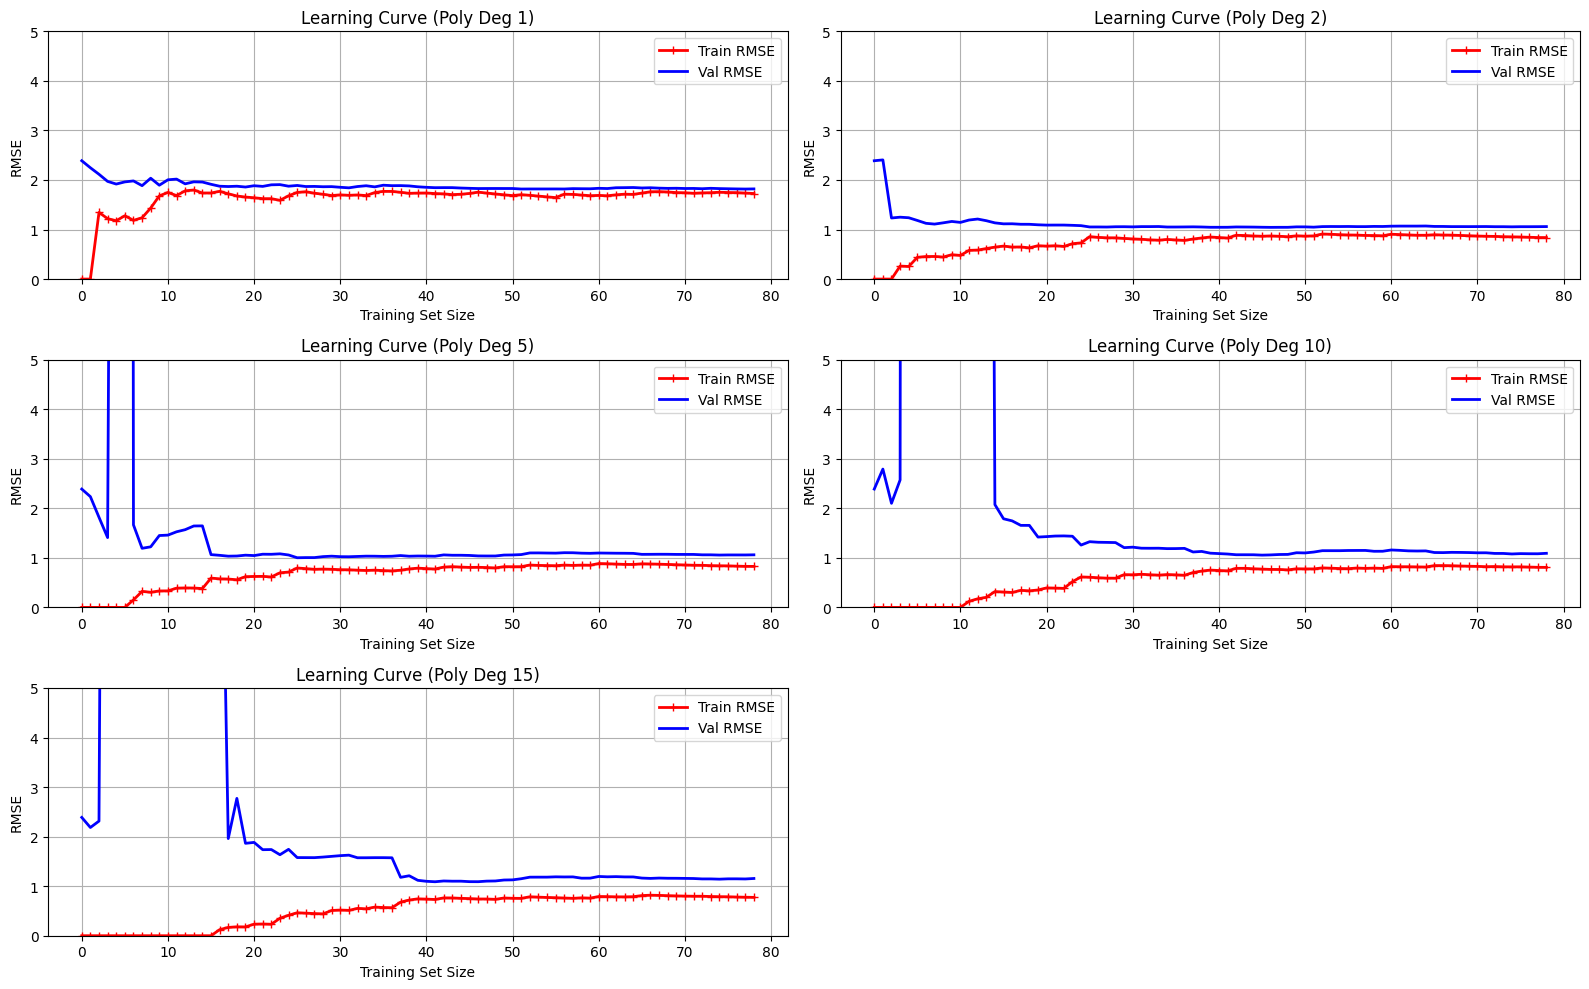

In [22]:
degrees = [1, 2, 5, 10, 15]

plt.figure(figsize=(16, 10))
for idx, degree in enumerate(degrees, 1):
    poly_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression())
    ])

    plt.subplot(3, 2, idx)
    plot_learning_curves(poly_pipeline, X_poly_raw, y_poly, label=f"Degree = {degree}")
    plt.ylim(0, 5)
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curve (Poly Deg {degree})")

plt.tight_layout()
plt.show()


In [23]:
# Pipeline dengan PolynomialFeatures degree 10 + StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

poly_10_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_poly_scaled = poly_10_scaler.fit_transform(X_poly_raw)


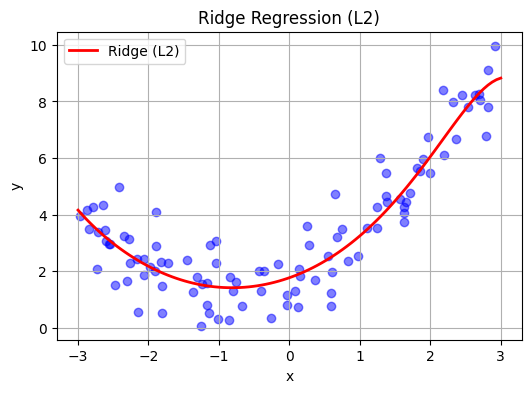

In [24]:
ridge_reg = Ridge(alpha=1.0, solver="cholesky")
ridge_reg.fit(X_poly_scaled, y_poly)

# Prediksi
y_ridge_pred = ridge_reg.predict(poly_10_scaler.transform(X_plot))

# Plot
plt.figure(figsize=(6,4))
plt.plot(X_plot, y_ridge_pred, "r-", linewidth=2, label="Ridge (L2)")
plt.scatter(X_poly_raw, y_poly, color='blue', alpha=0.5)
plt.title("Ridge Regression (L2)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


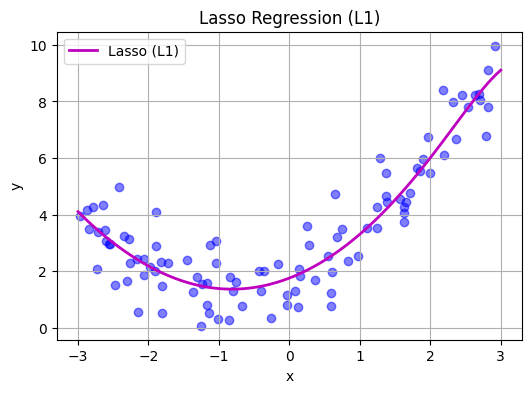

In [25]:
lasso_reg = Lasso(alpha=0.01, max_iter=10000)
lasso_reg.fit(X_poly_scaled, y_poly)
y_lasso_pred = lasso_reg.predict(poly_10_scaler.transform(X_plot))

plt.figure(figsize=(6,4))
plt.plot(X_plot, y_lasso_pred, "m-", linewidth=2, label="Lasso (L1)")
plt.scatter(X_poly_raw, y_poly, color='blue', alpha=0.5)
plt.title("Lasso Regression (L1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


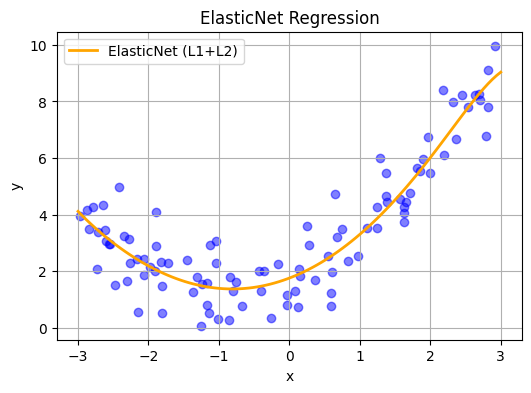

In [26]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_poly_scaled, y_poly)
y_elastic_pred = elastic_net.predict(poly_10_scaler.transform(X_plot))

plt.figure(figsize=(6,4))
plt.plot(X_plot, y_elastic_pred, "orange", linewidth=2, label="ElasticNet (L1+L2)")
plt.scatter(X_poly_raw, y_poly, color='blue', alpha=0.5)
plt.title("ElasticNet Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
from sklearn import datasets

# Load dataset iris
iris = datasets.load_iris()
X_iris = iris["data"][:, 3:]  # hanya petal width
y_iris = (iris["target"] == 2).astype(int)  # 1 kalau Virginica, 0 lainnya


In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs")
log_reg.fit(X_iris, y_iris)

# Prediksi probabilitas
X_test = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_test)


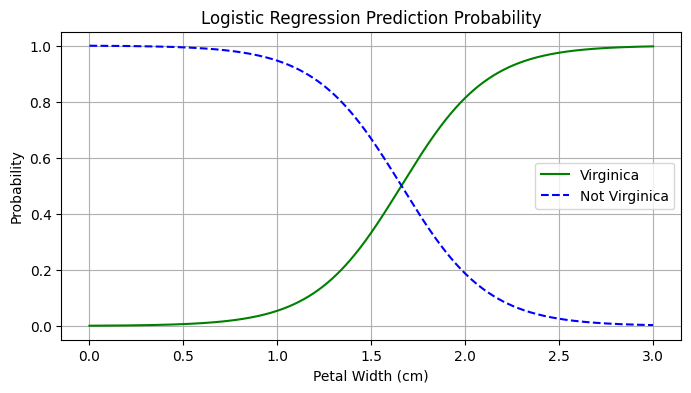

In [29]:
plt.figure(figsize=(8, 4))
plt.plot(X_test, y_proba[:, 1], "g-", label="Virginica")
plt.plot(X_test, y_proba[:, 0], "b--", label="Not Virginica")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression Prediction Probability")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Garis decision boundary di mana probabilitas = 0.5
decision_boundary = X_test[y_proba[:, 1] >= 0.5][0]

print("Decision boundary (petal width):", decision_boundary)


Decision boundary (petal width): [1.66066066]


In [31]:
# Pakai 2 fitur: petal length dan petal width
X_softmax = iris["data"][:, (2, 3)]
y_softmax = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_softmax, y_softmax)

# Prediksi untuk contoh baru
example = np.array([[5, 2]])
prediction = softmax_reg.predict(example)
proba = softmax_reg.predict_proba(example)

print("Prediction:", iris["target_names"][prediction[0]])
print("Probabilities:", proba)


Prediction: virginica
Probabilities: [[6.21626374e-07 5.73689802e-02 9.42630398e-01]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
